<a href="https://colab.research.google.com/github/kumrathod/Edahotelbookings/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv ("/content/Hotel Bookings.csv")

In [3]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'] )

In [4]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.drop(['agent','company'],axis = 1, inplace = True)

In [7]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [8]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
df = df[df['adr']<5000]

In [12]:
df['hotel'].value_counts()

City Hotel      79301
Resort Hotel    39596
Name: hotel, dtype: int64

-> we have got only two types of hotel i.e, City hotel and Resort hotel


In [13]:
df['adults'].groupby(df['hotel']).mean()

hotel
City Hotel      1.851124
Resort Hotel    1.872942
Name: adults, dtype: float64

In [14]:
df['children'].groupby(df['hotel']).mean()

hotel
City Hotel      0.091399
Resort Hotel    0.129862
Name: children, dtype: float64

-> we conclude that adults and childrens prefer Resort Hotel over City Hotel

In [15]:
# adding a column for canceled and non canceled values (1,0) with canceled and not_canceled
df['cancelation'] = df.is_canceled.replace(to_replace= [1,0] , value= ['canceled', 'not_canceled'])

<ipython-input-15-e6a3facb8dc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cancelation'] = df.is_canceled.replace(to_replace= [1,0] , value= ['canceled', 'not_canceled'])


In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,not_canceled


In [17]:
df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,not_canceled
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,not_canceled
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,not_canceled
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,not_canceled
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,not_canceled


Text(0.5, 1.0, 'cancelation plot for hotel booking customers')

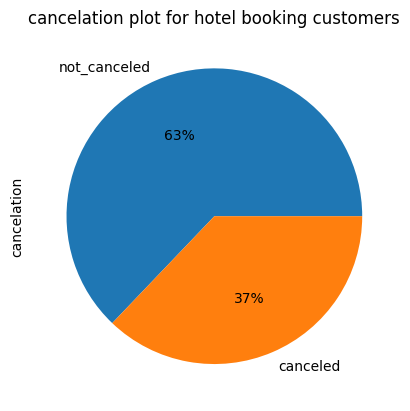

In [19]:
df_canceled = df['cancelation']
df_canceled.value_counts().plot(kind = 'pie',autopct = "%.0f%%")
plt.title("cancelation plot for hotel booking customers")


In [20]:
cancelation_by_hotel= df[df['cancelation']== 'canceled'].groupby(['hotel']).size()
cancelation_by_hotel


hotel
City Hotel      33075
Resort Hotel    11077
dtype: int64

 -> here we conclude that cancelation of city hotel bookings are more compared to resort hotel

In [23]:
percentage_of_cancelation_CityHotel = cancelation_by_hotel['City Hotel']/df['hotel'].value_counts() ['City Hotel'] * 100
percentage_of_cancelation_CityHotel


41.70817518064085

In [24]:
percentage_of_cancelation_ResortHotel = cancelation_by_hotel['Resort Hotel']/df['hotel'].value_counts() ['Resort Hotel'] * 100
percentage_of_cancelation_ResortHotel

27.975047984644913

In [25]:
df_not_canceled=df[['hotel', 'is_canceled']][ df['is_canceled']==0].groupby(['hotel']).count()
df_not_canceled

,is_canceled
hotel,
City Hotel,46226
Resort Hotel,28519


Text(0.5, 1.0, 'Not canceled for booking individual hotels')

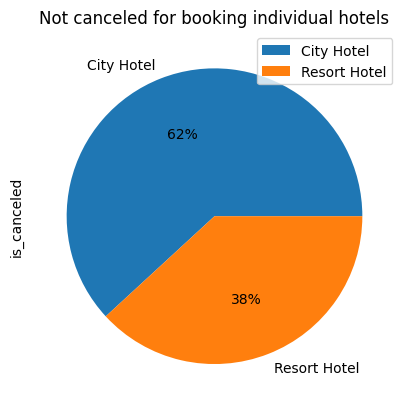

In [32]:
df_not_canceled.plot(kind = 'pie', fontsize =10,autopct = '%.0f%%', subplots = True )

plt.title("Not canceled for booking individual hotels")

In [19]:
df_hotel_by_year= df[['arrival_date_year', 'hotel']].value_counts().groupby('arrival_date_year').sum()

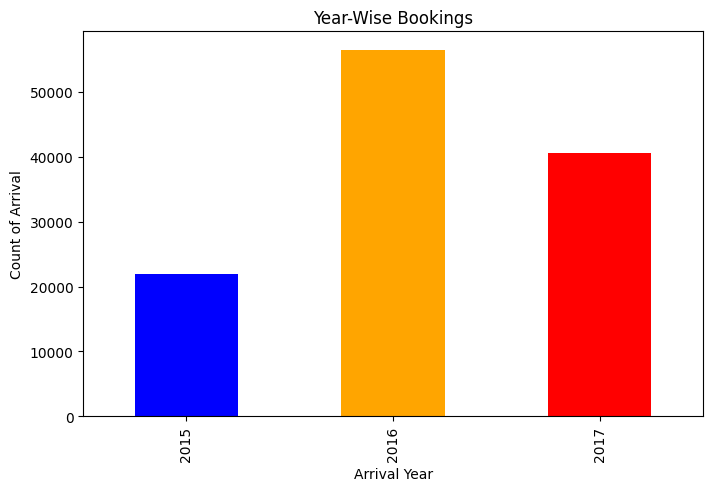

In [21]:
plt.rcParams['figure.figsize'] = (8,5)
df_hotel_by_year.plot(kind = 'bar',color = ['blue','orange','red'])
plt.title("Year-Wise Bookings")
plt.xlabel("Arrival Year")
plt.ylabel("Count of Arrival")
plt.show()

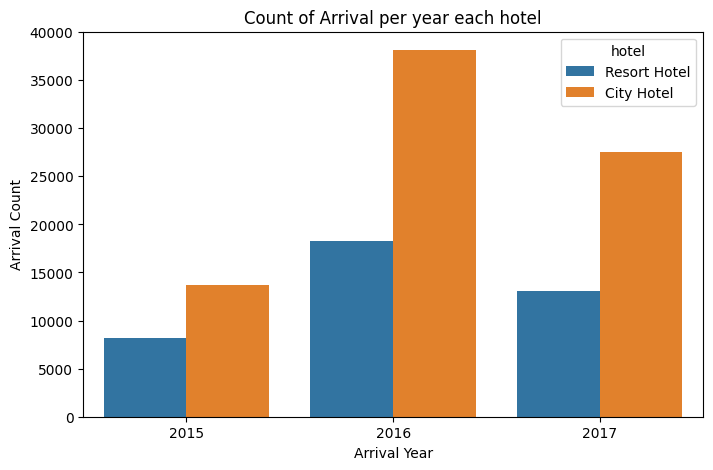

In [23]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(data = df, x ='arrival_date_year',hue = 'hotel')
plt.title("Count of Arrival per year each hotel")
plt.xlabel("Arrival Year")
plt.ylabel("Arrival Count")
plt.show()

-> Most Arrivals are observed in the Year 2016 which is nearly 2.5x then year 2015 and nearly 0.5x then year 2016